### crop the image into square & resize it into 640x640

In [1]:
import numpy as np
import cv2
from PIL import Image    
import matplotlib.pyplot as plt   
import matplotlib.image as mpimg
from matplotlib.colors import NoNorm
from skimage import transform
%matplotlib inline

In [2]:
import os, os.path
def num_of_img(DIR):
    print(len([name for name in os.listdir(DIR) if os.path.isfile(os.path.join(DIR, name))]))

In [3]:
# show image & get its information
# parameters: image_dir, image_title
# parameters: gray_or_not (True)

def show_image(image_dir, image_title, gray_or_not):
    img = mpimg.imread(image_dir)
    if gray_or_not == True:
        plt.imshow(img, cmap='gray',norm=NoNorm())
    else:
        plt.imshow(img)
    plt.title(image_title)
    plt.axis('off') 
    plt.show()
    I = Image.open(image_dir)
    print("Image's information:")
    print("1. size:", I.size)
    print("2. mode:", I.mode)
    print("3. format:", I.format)

In [4]:
def crop_max_center_square_and_resize_it(input_img):
    pil_img = Image.open(input_img)
    crop_width, crop_height = min(pil_img.size), min(pil_img.size)
    img_width, img_height = pil_img.size
    left = (img_width - crop_width) // 2
    top = (img_height - crop_height) // 2
    right = (img_width + crop_width) // 2
    bottom = (img_height + crop_height) // 2
    cropped_img = pil_img.crop((left, top, right, bottom))
    resized_img = cropped_img.resize((640, 640))
    return resized_img

In [5]:
image_dir = 'kidney_ultrasound_imageSet/Not_acute_pyelonephritis'

In [6]:
num_of_img(image_dir)

126


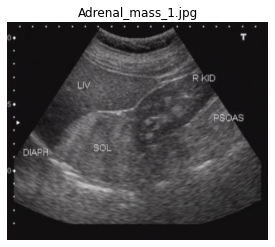

Image's information:
1. size: (552, 460)
2. mode: RGB
3. format: JPEG


In [7]:
img_name1 = 'Adrenal_mass_1.jpg'
image1 = image_dir + '/' + img_name1
show_image(image1, img_name1, False)

In [8]:
img1_2 = crop_max_center_square_and_resize_it(image1)

In [9]:
img1_2.size

(640, 640)

In [10]:
filepath2 = 'kidney_ultrasound_cropped_img/Not_acute_pyelonephritis'
imgpath2 = filepath2 + '/' + img_name1

In [11]:
imgpath2

'kidney_ultrasound_cropped_img/Not_acute_pyelonephritis/Adrenal_mass_1.jpg'

In [12]:
img1_2.save(imgpath2)

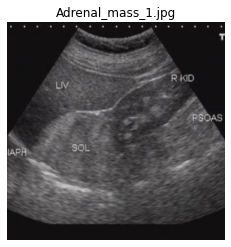

Image's information:
1. size: (640, 640)
2. mode: RGB
3. format: JPEG


In [13]:
show_image(imgpath2, img_name1, False)

### fill black border 

In [17]:
from PIL import Image, ImageOps
image2 = image_dir + '/' + img_name1
img = Image.open(image2)
img_with_border = ImageOps.expand(img,border=50,fill='black')
img_with_border.save('imaged-with-border.png')

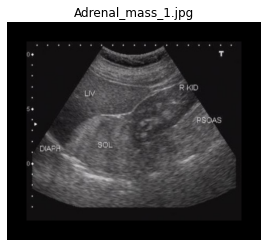

Image's information:
1. size: (652, 560)
2. mode: RGB
3. format: PNG


In [19]:
show_image('imaged-with-border.png', img_name1, False)